# COVID-19 Interactive Analysis Dashboard

## Dataset Source: John Hopkins University

# Articulated By:
### Hemant Jain,Northeastern University,Boston

In [1]:
# importing libraries
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets

In [2]:
# loading data right from the source:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

# Death Dataframe Top 5 elements

In [3]:
death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


# Confirmed Dataframe Top 5 elements

In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


# Recovered Dataframe Top 5 elements

In [5]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,150,166,179,188,188,207,220,228,252,260
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,345,356,385,394,403,410,422,431,455,470
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1152,1204,1355,1408,1479,1508,1558,1651,1702,1779
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,282,309,333,344,344,344,385,398,423,468
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,7,7


# Country Dataframe Top 5 elements

In [6]:
country_df.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-05-01 04:32:28,-25.0000,133.0000,6766,93,5742,931,26.575333,NaN,NaN,1.374520,36,AUS
1,Austria,2020-05-01 04:32:28,47.5162,14.5501,15452,584,12907,1961,171.566886,NaN,NaN,3.779446,40,AUT
2,Canada,2020-05-01 04:32:28,60.0010,-95.0010,54457,3310,21424,29723,143.854154,NaN,NaN,6.078190,124,CAN
3,China,2020-05-01 04:32:28,30.5928,114.3055,83956,4637,78523,796,5.976893,NaN,NaN,5.523131,156,CHN
4,Denmark,2020-05-01 04:32:28,56.0000,10.0000,9356,452,6741,2163,161.527488,NaN,NaN,4.831124,208,DNK


# Country Dataframe After Data Cleaning

In [7]:
# data cleaning

#1.Renaming the df column names to lowercase
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)
country_df

,country_region,last_update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3
0,Australia,2020-05-01 04:32:28,-25.000000,133.000000,6766,93,5742,931,26.575333,NaN,NaN,1.374520,36,AUS
1,Austria,2020-05-01 04:32:28,47.516200,14.550100,15452,584,12907,1961,171.566886,NaN,NaN,3.779446,40,AUT
2,Canada,2020-05-01 04:32:28,60.001000,-95.001000,54457,3310,21424,29723,143.854154,NaN,NaN,6.078190,124,CAN
3,China,2020-05-01 04:32:28,30.592800,114.305500,83956,4637,78523,796,5.976893,NaN,NaN,5.523131,156,CHN
4,Denmark,2020-05-01 04:32:28,56.000000,10.000000,9356,452,6741,2163,161.527488,NaN,NaN,4.831124,208,DNK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,2020-05-01 04:32:28,31.952200,35.233200,344,2,76,266,6.743226,NaN,NaN,0.581395,275,PSE
183,Western Sahara,2020-05-01 04:32:28,24.215500,-12.885800,6,0,5,1,1.004470,NaN,NaN,0.000000,732,ESH
184,Yemen,2020-05-01 04:32:28,15.552727,48.516388,6,2,1,3,0.020117,NaN,NaN,33.333333,887,YEM
185,Zambia,2020-05-01 04:32:28,-13.133897,27.849332,106,3,55,48,0.576590,NaN,NaN,2.830189,894,ZMB


# Country Dataframe Column List

In [8]:
country_df.columns

Index(['country_region', 'last_update', 'lat', 'long_', 'confirmed', 'deaths',
       'recovered', 'active', 'incident_rate', 'people_tested',
       'people_hospitalized', 'mortality_rate', 'uid', 'iso3'],
      dtype='object')

In [9]:
#2.Changing province/state to state and country/region to country

confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})


# Listing out the Country Dataframe after all Data Pre-processing and Data Cleansing

In [10]:
country_df.head()

,country,last_update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3
0,Australia,2020-05-01 04:32:28,-25.0000,133.0000,6766,93,5742,931,26.575333,NaN,NaN,1.374520,36,AUS
1,Austria,2020-05-01 04:32:28,47.5162,14.5501,15452,584,12907,1961,171.566886,NaN,NaN,3.779446,40,AUT
2,Canada,2020-05-01 04:32:28,60.0010,-95.0010,54457,3310,21424,29723,143.854154,NaN,NaN,6.078190,124,CAN
3,China,2020-05-01 04:32:28,30.5928,114.3055,83956,4637,78523,796,5.976893,NaN,NaN,5.523131,156,CHN
4,Denmark,2020-05-01 04:32:28,56.0000,10.0000,9356,452,6741,2163,161.527488,NaN,NaN,4.831124,208,DNK


# Listing out the Recovered Dataframe after all Data Pre-processing and Data Cleansing

In [11]:
recovered_df.head()

,state,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


# Listing out the Death Dataframe after all Data Pre-processing and Data Cleansing

In [12]:
death_df.head()

,state,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [13]:
sorted_country_df = country_df.sort_values('confirmed',ascending=False).head(5)

# Top 5 Confirmed Countries

In [14]:
sorted_country_df

,country,last_update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3
17,US,2020-05-01 04:32:28,40.000000,-100.00000,1069826,63006,153947,876906,324.714866,NaN,NaN,5.889369,840,USA
161,Spain,2020-05-01 04:32:28,40.463667,-3.74922,213435,24543,112050,76842,456.498750,NaN,NaN,11.499051,724,ESP
10,Italy,2020-05-01 04:32:28,41.871900,12.56740,205463,27967,75945,101551,339.822673,NaN,NaN,13.611697,380,ITA
16,United Kingdom,2020-05-01 04:32:28,55.000000,-3.00000,172481,26842,859,144780,254.074463,NaN,NaN,15.562294,826,GBR
6,France,2020-05-01 04:32:28,46.227600,2.21370,167299,24410,50380,92509,256.304579,NaN,NaN,14.590643,250,FRA


# Total number of confirmed cases

In [15]:
# total number of confirmed cases
confirmed_total = int(country_df['confirmed'].sum())
confirmed_total

3257520

# Total number of Death cases

In [16]:
# total number of deaths cases
deaths_total = int(country_df['deaths'].sum())
deaths_total

233405

# Total number of Recovered cases

In [17]:
# total number of recovered cases
recovered_total = int(country_df['recovered'].sum())
recovered_total

1014809

# Total number of active cases

In [18]:
# total number of active cases
active_total = int(country_df['active'].sum())
active_total

2033339

In [19]:
confirmed_df.head()

,state,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [20]:
country_df.sort_values('confirmed', ascending= False)
country_df.head()

,country,last_update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3
0,Australia,2020-05-01 04:32:28,-25.0000,133.0000,6766,93,5742,931,26.575333,NaN,NaN,1.374520,36,AUS
1,Austria,2020-05-01 04:32:28,47.5162,14.5501,15452,584,12907,1961,171.566886,NaN,NaN,3.779446,40,AUT
2,Canada,2020-05-01 04:32:28,60.0010,-95.0010,54457,3310,21424,29723,143.854154,NaN,NaN,6.078190,124,CAN
3,China,2020-05-01 04:32:28,30.5928,114.3055,83956,4637,78523,796,5.976893,NaN,NaN,5.523131,156,CHN
4,Denmark,2020-05-01 04:32:28,56.0000,10.0000,9356,452,6741,2163,161.527488,NaN,NaN,4.831124,208,DNK


# Calendar Graphical Representation for Confirmed,Deaths,Recovered Number of Cases

In [21]:
country_df.iloc[:,:].corr().style.background_gradient(cmap='Reds')

C:\Users\jainh\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning:

invalid value encountered in less



,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid
lat,1,0.023073,0.159993,0.186987,0.194076,0.130899,0.338765,nan,nan,0.1178,-0.0108863
long_,0.023073,1,-0.14246,-0.147806,-0.0723423,-0.15066,-0.0661538,nan,nan,-0.292258,0.0456335
confirmed,0.159993,-0.14246,1,0.929314,0.789032,0.979955,0.171019,nan,nan,0.136073,0.0142157
deaths,0.186987,-0.147806,0.929314,1,0.770479,0.884888,0.211448,nan,nan,0.256128,0.0107946
recovered,0.194076,-0.0723423,0.789032,0.770479,1,0.653159,0.193267,nan,nan,0.160777,-0.0144913
active,0.130899,-0.15066,0.979955,0.884888,0.653159,1,0.143791,nan,nan,0.103209,0.0220946
incident_rate,0.338765,-0.0661538,0.171019,0.211448,0.193267,0.143791,1,nan,nan,0.0763288,0.0228817
people_tested,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
people_hospitalized,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mortality_rate,0.1178,-0.292258,0.136073,0.256128,0.160777,0.103209,0.0763288,nan,nan,1,0.16441


In [24]:

fig = px.choropleth(confirmed_df, locations="country", locationmode='country names', color='country', 
                    hover_name="country",
                    title='Choropleth Graphical Representation of Cases over time', color_continuous_scale=px.colors.sequential.Magenta)
fig.update(layout_coloraxis_showscale=False)
fig.update_layout(width=700)
fig.show()

# HeatMap Representation for Different Countries

In [25]:
fig = go.Figure(data=go.Heatmap(
        z=country_df['active'],
        x=country_df['last_update'],
        y=country_df['country'],
        colorscale='Reds',
        showlegend=False,
        text=country_df['active']))

fig.update_layout(yaxis = dict(dtick = 1))
fig.update_layout(width=700,height=3000)
fig.show()

# Real Time Running Graphical Representation of COVID-19 visualization

In [26]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/1571387"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

In [27]:
fig = px.scatter(country_df.sort_values('deaths', ascending=False).iloc[:15, :], 
                 x='confirmed', y='deaths', color='country', size='confirmed', height=700,
                 text='country', log_x=True, log_y=True, title='Deaths vs Confirmed (Scale is in log10)')
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False,width=700)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [28]:
full_latest = country_df[country_df['last_update'] == max(country_df['last_update'])]
                         
fig = px.treemap(full_latest.sort_values(by='confirmed', ascending=False).reset_index(drop=True), 
                 path=["country"], values="confirmed", height=700,width=700,
                 title='Number of Confirmed Cases',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

fig = px.treemap(full_latest.sort_values(by='deaths', ascending=False).reset_index(drop=True), 
                 path=["country"], values="deaths", height=700,width=700,
                 title='Number of Deaths reported',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

In [29]:
import plotly.express as px
fig = px.scatter_geo(confirmed_df, lat="lat", lon="long", color="country",
 hover_name="country", size="4/30/20",title='GEO Scatter Distribution for Natural Earth projection',
 projection="natural earth",width=700)
fig.show()

In [30]:
import plotly.express as px
fig = px.scatter_geo(confirmed_df, lat="lat", lon="long", color="country",
 hover_name="country", size="4/30/20",title='GEO Scatter Distribution for Orthographic projection',
 projection="orthographic",width=700)
fig.show()

# Number of Confirmed Cases Date-wise

In [31]:
from datetime import date,timedelta

start_date = date(2020,1,22)
end_date = date.today() - timedelta(days=2)

date_list = [start_date + timedelta(days=x) for x in range((end_date - start_date).days)]

line_df = pd.DataFrame()

for d in date_list:
    d_str = d.strftime('%m/%d/%y')[1:]
    if d_str[2] == '0':
        d_str = d_str[:2] + d_str[3:]

    temp_df = confirmed_df[[d_str,'country']]
    
    temp_df = temp_df.groupby(['country'])[d_str].sum().reset_index()
    temp_df = temp_df.rename(columns={d_str: 'confirmed_cases'})
    temp_df = temp_df.assign(Date=d_str)
    
    line_df = line_df.append(temp_df,ignore_index=True)
    
line_df

,country,confirmed_cases,Date
0,Afghanistan,0,1/22/20
1,Albania,0,1/22/20
2,Algeria,0,1/22/20
3,Andorra,0,1/22/20
4,Angola,0,1/22/20
...,...,...,...
18321,West Bank and Gaza,343,4/28/20
18322,Western Sahara,6,4/28/20
18323,Yemen,1,4/28/20
18324,Zambia,95,4/28/20


In [32]:
import plotly.express as px

fig = px.line(line_df, x="Date", y="confirmed_cases",title='Line Graph Representation', color='country',width=700)
fig.show()

In [33]:
import plotly.express as px
fig = px.line(line_df[line_df['Date']>'3/1/2020'], x="Date", y="confirmed_cases",title='Line Graph after 3/1/2020', color='country',width=700)
fig.show()

# PieCharts for the Total Number of Deaths,Confirmed,Active and Recovered Cases.

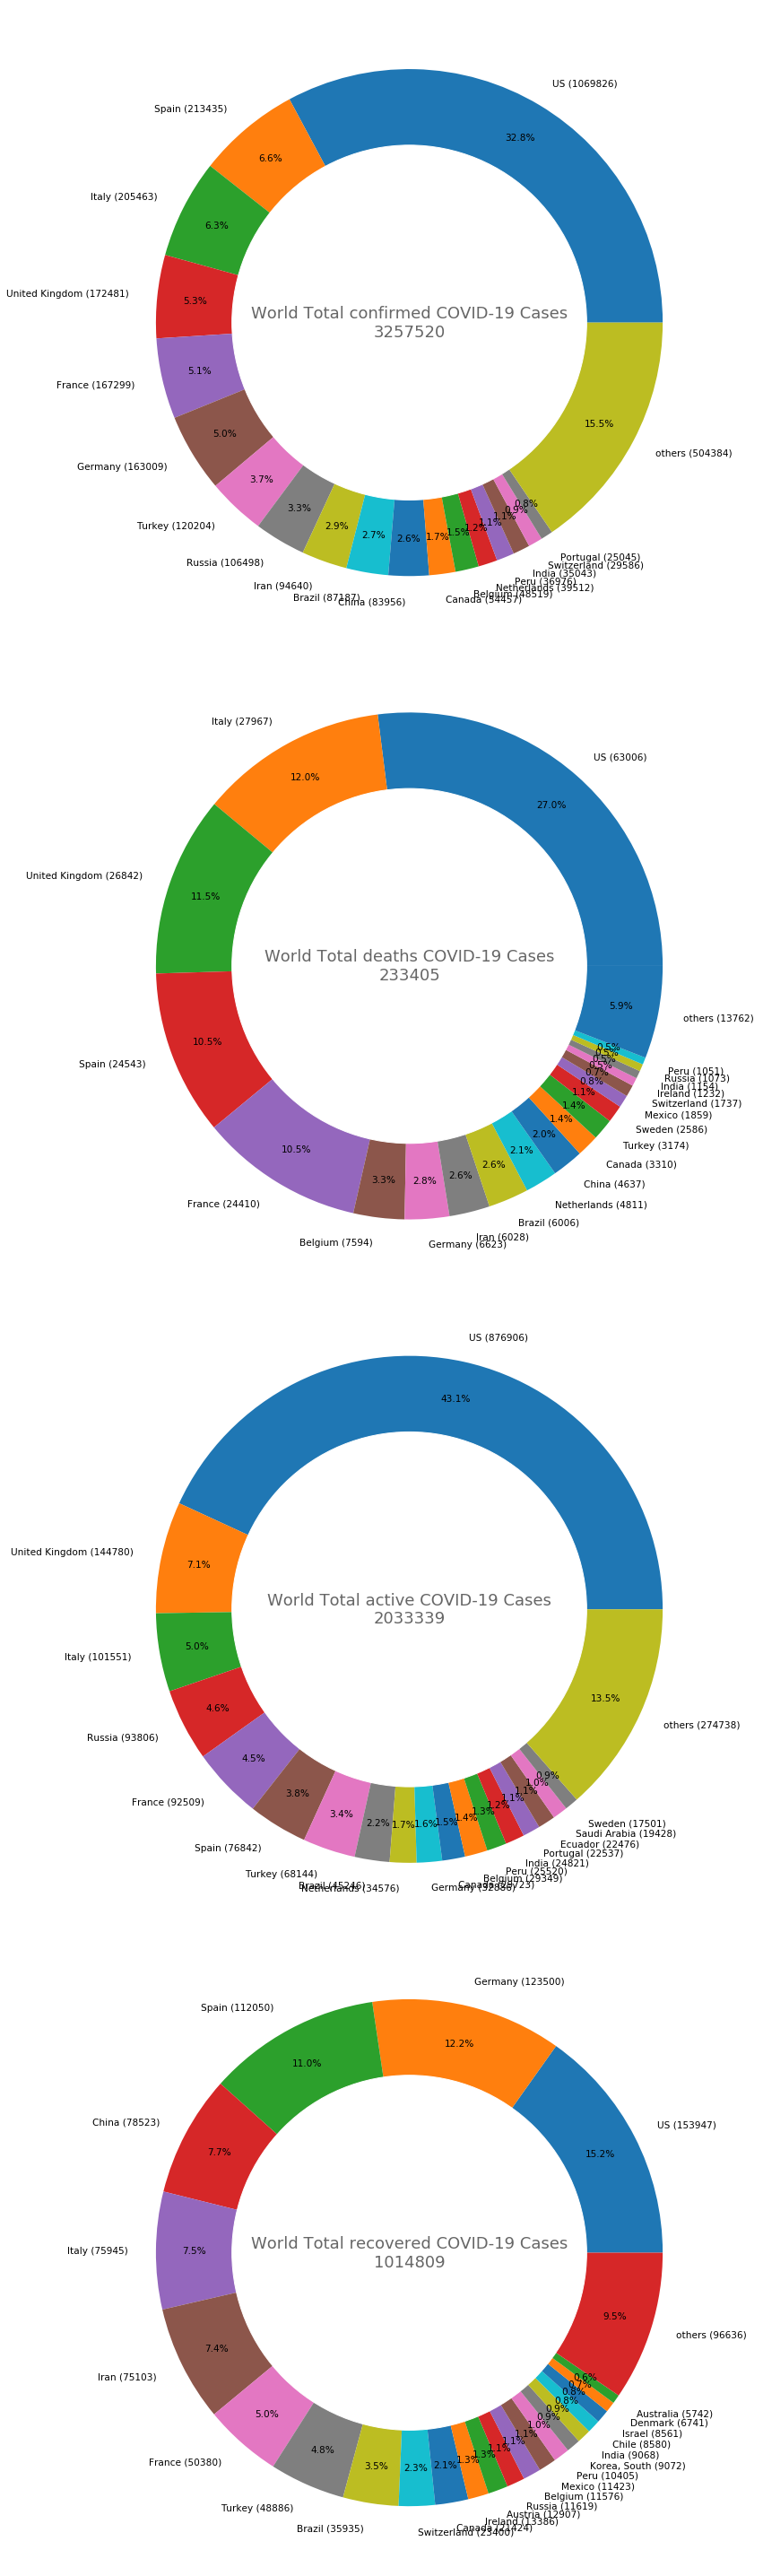

In [34]:
rows = 4
f = plt.figure(figsize=(15,10*rows))

stats = [country_df.loc[:,['country','confirmed']],country_df.loc[:,['country','deaths']],country_df.loc[:,['country','active']],country_df.loc[:,['country','recovered']]]
label = ["confirmed","deaths","active","recovered"]
threshold = [25000,1000,15000,5000]
for i, stat in enumerate(stats):
    plt.tight_layout()
    df_countries = stat.groupby(["country"]).sum()
    df_countries = df_countries.sort_values(df_countries.columns[-1],ascending= False)
    others = df_countries[df_countries[df_countries.columns[-1]] < threshold[i] ].sum()[-1]
    df_countries = df_countries[df_countries[df_countries.columns[-1]] > threshold[i]]
    df_countries = df_countries[df_countries.columns[-1]]
    df_countries["others"] = others
    labels = [df_countries.index[i] +" (" + str(int(df_countries[i])) +") "for i in range(df_countries.shape[0])]

    ax = f.add_subplot(rows,1,i+1)
    plt.pie(df_countries, labels=labels,autopct='%1.1f%%',pctdistance=0.85, labeldistance=1.1,textprops = {'fontsize':10.5})
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.text(0.5,0.5,"World Total "+label[i]+ " COVID-19 Cases\n"+str(stat.sum().values[1]), horizontalalignment='center',verticalalignment='center',transform=ax.transAxes, size=18, alpha = 0.6)


plt.show()

# Visualising the total number of Confirmed,Deaths and Recovered cases across globe

In [35]:
# displaying the total stats

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:30px; margin-left:20px;'> Recovered: " + str(recovered_total) + "</span>"+
             "</div>")
       )

# Dynamic listing of Top N number of Countries

In [36]:
# sorting the values by confirmed descednding order
# country_df.sort_values('confirmed', ascending= False).head(10).style.background_gradient(cmap='copper')
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    r = 'background-color: red'
    y = 'background-color: purple'
    g = 'background-color: grey'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 4] = y
    df1.iloc[:, 5] = r
    df1.iloc[:, 6] = g
    
    return df1

def show_latest_cases(n):
    n = int(n)
    return country_df.sort_values('confirmed', ascending= False).head(n).style.apply(highlight_col, axis=None)

interact(show_latest_cases, n='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

# Confirmed Cases Countries Listing 

In [37]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False)
sorted_country_df

,country,last_update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3
17,US,2020-05-01 04:32:28,40.000000,-100.000000,1069826,63006,153947,876906,324.714866,NaN,NaN,5.889369,840,USA
161,Spain,2020-05-01 04:32:28,40.463667,-3.749220,213435,24543,112050,76842,456.498750,NaN,NaN,11.499051,724,ESP
10,Italy,2020-05-01 04:32:28,41.871900,12.567400,205463,27967,75945,101551,339.822673,NaN,NaN,13.611697,380,ITA
16,United Kingdom,2020-05-01 04:32:28,55.000000,-3.000000,172481,26842,859,144780,254.074463,NaN,NaN,15.562294,826,GBR
6,France,2020-05-01 04:32:28,46.227600,2.213700,167299,24410,50380,92509,256.304579,NaN,NaN,14.590643,250,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Mauritania,2020-05-01 04:32:28,21.007900,-10.940800,8,1,6,1,0.172056,NaN,NaN,12.500000,478,MRT
35,Bhutan,2020-05-01 04:32:28,27.514200,90.433600,7,0,5,2,0.907192,NaN,NaN,0.000000,64,BTN
183,Western Sahara,2020-05-01 04:32:28,24.215500,-12.885800,6,0,5,1,1.004470,NaN,NaN,0.000000,732,ESH
184,Yemen,2020-05-01 04:32:28,15.552727,48.516388,6,2,1,3,0.020117,NaN,NaN,33.333333,887,YEM


# Scatter Plot for Top 10 Countries for the Number of Confirmed Cases

In [38]:
fig = px.scatter(sorted_country_df.head(10),x='country',y='confirmed',size='confirmed',color='country',hover_name='country',size_max=60)
fig.update_layout(
    title=" Worst hit countries",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    width = 700
    )
fig.show()

# Plotting the n number of worst hit countries using Bubble Chart

In [39]:
# plotting the 20 worst hit countries

def bubble_chart(n):
    fig = px.scatter(sorted_country_df.head(n), x="country", y="confirmed", size="confirmed", color="country",
               hover_name="country", size_max=60)
    fig.update_layout(
    title=str(n) +" Worst hit countries",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    width = 700
    )
    fig.show();

interact(bubble_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

TraitError: Element of the 'children' trait of a VBox instance must be a Widget, but a value of Figure({
    'data': [{'hovertemplate': ('<b>%{hovertext}</b><br><br>cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['US'], dtype=object),
              'legendgroup': 'US',
              'marker': {'color': '#636efa',
                         'size': array([1069826], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 297.1738888888889,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'US',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['US'], dtype=object),
              'xaxis': 'x',
              'y': array([1069826], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Spain'], dtype=object),
              'legendgroup': 'Spain',
              'marker': {'color': '#EF553B',
                         'size': array([213435], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 297.1738888888889,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Spain',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Spain'], dtype=object),
              'xaxis': 'x',
              'y': array([213435], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Italy'], dtype=object),
              'legendgroup': 'Italy',
              'marker': {'color': '#00cc96',
                         'size': array([205463], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 297.1738888888889,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Italy',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Italy'], dtype=object),
              'xaxis': 'x',
              'y': array([205463], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['United Kingdom'], dtype=object),
              'legendgroup': 'United Kingdom',
              'marker': {'color': '#ab63fa',
                         'size': array([172481], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 297.1738888888889,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'United Kingdom',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['United Kingdom'], dtype=object),
              'xaxis': 'x',
              'y': array([172481], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['France'], dtype=object),
              'legendgroup': 'France',
              'marker': {'color': '#FFA15A',
                         'size': array([167299], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 297.1738888888889,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'France',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['France'], dtype=object),
              'xaxis': 'x',
              'y': array([167299], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Germany'], dtype=object),
              'legendgroup': 'Germany',
              'marker': {'color': '#19d3f3',
                         'size': array([163009], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 297.1738888888889,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Germany',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Germany'], dtype=object),
              'xaxis': 'x',
              'y': array([163009], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Turkey'], dtype=object),
              'legendgroup': 'Turkey',
              'marker': {'color': '#FF6692',
                         'size': array([120204], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 297.1738888888889,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Turkey',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Turkey'], dtype=object),
              'xaxis': 'x',
              'y': array([120204], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Russia'], dtype=object),
              'legendgroup': 'Russia',
              'marker': {'color': '#B6E880',
                         'size': array([106498], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 297.1738888888889,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Russia',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Russia'], dtype=object),
              'xaxis': 'x',
              'y': array([106498], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Iran'], dtype=object),
              'legendgroup': 'Iran',
              'marker': {'color': '#FF97FF',
                         'size': array([94640], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 297.1738888888889,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Iran',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Iran'], dtype=object),
              'xaxis': 'x',
              'y': array([94640], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Brazil'], dtype=object),
              'legendgroup': 'Brazil',
              'marker': {'color': '#FECB52',
                         'size': array([87187], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 297.1738888888889,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Brazil',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Brazil'], dtype=object),
              'xaxis': 'x',
              'y': array([87187], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'legend': {'itemsizing': 'constant', 'title': {'text': 'country'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'title': {'text': ' Worst hit countries'},
               'width': 700,
               'xaxis': {'anchor': 'y',
                         'categoryarray': [US, Spain, Italy, United Kingdom,
                                           France, Germany, Turkey, Russia, Iran,
                                           Brazil],
                         'categoryorder': 'array',
                         'domain': [0.0, 1.0],
                         'title': {'text': 'Countries'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Confirmed Cases'}}}
}) <class 'plotly.graph_objs._figure.Figure'> was specified.

In [41]:
def plot_cases_of_a_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [confirmed_df, death_df]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ));
    
    fig.update_layout(
        title="COVID 19 cases of " + country,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 800,
        
    );
    
    fig.update_yaxes(type="linear")
    fig.show();

    


# Plot the number of cases in India

In [42]:
plot_cases_of_a_country('India')

# For User Defined Country plot for the Confirmed and Death Numbers

In [43]:
interact(plot_cases_of_a_country, country='World')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='World', description='country'), Output()), _dom_classes=('widget-interact',)…

TraitError: Element of the 'children' trait of a VBox instance must be a Widget, but a value of Figure({
    'data': [{'hovertemplate': ('<b>%{hovertext}</b><br><br>cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['US'], dtype=object),
              'legendgroup': 'US',
              'marker': {'color': '#636efa',
                         'size': array([1069826], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 297.1738888888889,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'US',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['US'], dtype=object),
              'xaxis': 'x',
              'y': array([1069826], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Spain'], dtype=object),
              'legendgroup': 'Spain',
              'marker': {'color': '#EF553B',
                         'size': array([213435], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 297.1738888888889,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Spain',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Spain'], dtype=object),
              'xaxis': 'x',
              'y': array([213435], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Italy'], dtype=object),
              'legendgroup': 'Italy',
              'marker': {'color': '#00cc96',
                         'size': array([205463], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 297.1738888888889,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Italy',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Italy'], dtype=object),
              'xaxis': 'x',
              'y': array([205463], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['United Kingdom'], dtype=object),
              'legendgroup': 'United Kingdom',
              'marker': {'color': '#ab63fa',
                         'size': array([172481], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 297.1738888888889,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'United Kingdom',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['United Kingdom'], dtype=object),
              'xaxis': 'x',
              'y': array([172481], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['France'], dtype=object),
              'legendgroup': 'France',
              'marker': {'color': '#FFA15A',
                         'size': array([167299], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 297.1738888888889,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'France',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['France'], dtype=object),
              'xaxis': 'x',
              'y': array([167299], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Germany'], dtype=object),
              'legendgroup': 'Germany',
              'marker': {'color': '#19d3f3',
                         'size': array([163009], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 297.1738888888889,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Germany',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Germany'], dtype=object),
              'xaxis': 'x',
              'y': array([163009], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Turkey'], dtype=object),
              'legendgroup': 'Turkey',
              'marker': {'color': '#FF6692',
                         'size': array([120204], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 297.1738888888889,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Turkey',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Turkey'], dtype=object),
              'xaxis': 'x',
              'y': array([120204], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Russia'], dtype=object),
              'legendgroup': 'Russia',
              'marker': {'color': '#B6E880',
                         'size': array([106498], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 297.1738888888889,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Russia',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Russia'], dtype=object),
              'xaxis': 'x',
              'y': array([106498], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Iran'], dtype=object),
              'legendgroup': 'Iran',
              'marker': {'color': '#FF97FF',
                         'size': array([94640], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 297.1738888888889,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Iran',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Iran'], dtype=object),
              'xaxis': 'x',
              'y': array([94640], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Brazil'], dtype=object),
              'legendgroup': 'Brazil',
              'marker': {'color': '#FECB52',
                         'size': array([87187], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 297.1738888888889,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Brazil',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Brazil'], dtype=object),
              'xaxis': 'x',
              'y': array([87187], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'legend': {'itemsizing': 'constant', 'title': {'text': 'country'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'title': {'text': ' Worst hit countries'},
               'width': 700,
               'xaxis': {'anchor': 'y',
                         'categoryarray': [US, Spain, Italy, United Kingdom,
                                           France, Germany, Turkey, Russia, Iran,
                                           Brazil],
                         'categoryorder': 'array',
                         'domain': [0.0, 1.0],
                         'title': {'text': 'Countries'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Confirmed Cases'}}}
}) <class 'plotly.graph_objs._figure.Figure'> was specified.

# 10 worst hit countries - Confirmed cases

In [44]:

px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "confirmed",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["yellow"], 
    height=500,
    width=800
)

# 10 worst hit countries - Death cases

In [45]:

px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "deaths",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["red"], 
    height=500,
    width=800
)

# 10 worst hit countries - Recovering cases

In [46]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "recovered",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["blue"], 
    height=500,
    width=800
)

# Global spread of COVID-19

In [47]:
world_map = folium.Map(location=[11,0], tiles="cartodbpositron", zoom_start=2, max_zoom = 6, min_zoom = 2)


for i in range(0,len(confirmed_df)):
    folium.Circle(
        location=[confirmed_df.iloc[i]['lat'], confirmed_df.iloc[i]['long']],
        fill=True,
        radius=(int((np.log(confirmed_df.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='red',
        fill_color='blue',
        tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+confirmed_df.iloc[i]['country'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed: "+str(confirmed_df.iloc[i,-1])+"</li>"+
                        "<li>Deaths:   "+str(death_df.iloc[i,-1])+"</li>"+
                        "<li>Death Rate: "+ str(np.round(death_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(world_map)

world_map

In [48]:
# import folium
# from IPython.display import display
# LDN_COORDINATES = (51.5074, 0.1278)
# myMap = folium.Map(location=LDN_COORDINATES, zoom_start=12)
# display(myMap)

In [49]:
# import folium

# london_location = [51.507351, -0.127758]

# m = folium.Map(location=london_location, zoom_start=15)
# m